# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Skillfactory---Практический-Machine-Learning" data-toc-modified-id="Skillfactory---Практический-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Skillfactory - Практический Machine Learning</a></div><div class="lev2 toc-item"><a href="#19/02/2018---Аномалии,-работа-с-признаками,-пайплайны-(практика)" data-toc-modified-id="19/02/2018---Аномалии,-работа-с-признаками,-пайплайны-(практика)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>19/02/2018 - Аномалии, работа с признаками, пайплайны (практика)</a></div><div class="lev1 toc-item"><a href="#Создание-пайплайна-и-генерация-признаков" data-toc-modified-id="Создание-пайплайна-и-генерация-признаков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Создание пайплайна и генерация признаков</a></div><div class="lev2 toc-item"><a href="#Посмотрим-на-данные" data-toc-modified-id="Посмотрим-на-данные-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим на данные</a></div><div class="lev2 toc-item"><a href="#Генерим-признаки" data-toc-modified-id="Генерим-признаки-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Генерим признаки</a></div><div class="lev2 toc-item"><a href="#Подбор-гипер-параметров" data-toc-modified-id="Подбор-гипер-параметров-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подбор гипер-параметров</a></div><div class="lev3 toc-item"><a href="#Pipeline" data-toc-modified-id="Pipeline-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Pipeline</a></div><div class="lev3 toc-item"><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Подбор гиперпараметров</a></div><div class="lev4 toc-item"><a href="#Grid-search" data-toc-modified-id="Grid-search-2321"><span class="toc-item-num">2.3.2.1&nbsp;&nbsp;</span>Grid search</a></div><div class="lev4 toc-item"><a href="#Random-Search" data-toc-modified-id="Random-Search-2322"><span class="toc-item-num">2.3.2.2&nbsp;&nbsp;</span>Random Search</a></div><div class="lev3 toc-item"><a href="#HyperOpt" data-toc-modified-id="HyperOpt-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>HyperOpt</a></div><div class="lev2 toc-item"><a href="#Ваш-черед" data-toc-modified-id="Ваш-черед-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Ваш черед</a></div><div class="lev3 toc-item"><a href="#Новые-признаки" data-toc-modified-id="Новые-признаки-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Новые признаки</a></div><div class="lev2 toc-item"><a href="#Поиск-гиперпараметров" data-toc-modified-id="Поиск-гиперпараметров-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Поиск гиперпараметров</a></div>

# Skillfactory - Практический Machine Learning
## 19/02/2018 - Аномалии, работа с признаками, пайплайны (практика)

<center> Шестаков Андрей </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Создание пайплайна и генерация признаков
<center>Шестаков Андрей</center>

В этом задании мы рассмотрим данные с предыдущего Sberbank Data Science Contest. К сожалению найти страницу с конкурсом уже не получается.

Одной из задач была опредление пола владельца карты по его транзакциям на карте. Зачем это нужно - одному сберу известно, но эта задача была хороша тем, что в ней можно нагенерировать много разных признаков

Есть такая [презентация](https://alexanderdyakonov.files.wordpress.com/2016/10/dj2016_sdsj_vis.pdf) с предварительным анализом данных и идеями про признаки

Нам понадобятся файлы `customers_gender_train.csv`, `transactions.tsv.gz`, `mcc_types.tsv` и `trans_types.tsv`.

## Посмотрим на данные

Это метки ответов

In [2]:
df_gender = pd.read_csv('data/customers_gender_train.csv')
df_gender.head()

,customer_id,gender
0,75562265,0
1,10928546,1
2,69348468,1
3,84816985,1
4,61009479,0


Это сами транзакции (отрицательные транзакции - списывание, положительные - зачисление на счет)

In [3]:
df_transactions = pd.read_csv('data/transactions.csv.gz')
df_transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN


Далее, расшифровки кодов [mcc](https://ru.wikipedia.org/wiki/Merchant_Category_Code) и транзакций

In [4]:
df_tr = pd.read_csv('data/tr_types.csv', sep=';')
df_tr.head()

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...


In [5]:
df_mcc = pd.read_csv('data/tr_mcc_codes.csv', sep=';')
df_mcc.head()

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


Первое что мы видем - это странная дата и суммы в транзакциях. 

В принципе, посмотрев на исходное распределение "относительных" дат по какой-нибудь гендерной группы mcc, становится примерно понятно, что за даты закодированы.

Ну а суммы транзакций организаторы просто умножили на $\pi^{\exp}$ =)

Преобразование будет проделано ниже, но при желании, можете сами со всем разобраться.

In [6]:
from pandas import Timestamp, DateOffset

In [7]:
def preproc_transactions(df_transactions):
    sec_per_day = 86400
    sec_per_hour = 3600
    
    start_date = 1420070400 - 154 * sec_per_day - 3 * sec_per_hour
    
    df_transactions.loc[:, 'day'] = df_transactions.tr_datetime\
                                               .str.split(' ')\
                                               .str.get(0)\
                                               .astype(int)
    df_transactions.loc[:, 'time_raw'] = df_transactions.tr_datetime\
                                                    .str.split(' ')\
                                                    .str.get(1)

    # set temp dt
    df_transactions.loc[:, 'dt_temp'] = pd.to_datetime(df_transactions.loc[:, 'time_raw'], 
                                                    format='%H:%M:%S')\
                                        + DateOffset(years=115)
    
    df_transactions = df_transactions.assign(dt = lambda x: x.dt_temp.astype(np.int64) // 10**9
                                             + (x.day - 153) * sec_per_day)\
                                     .assign(weekday = lambda x: ((x.day + 4) % 7 + 1))
        
    df_transactions.loc[:, 'datetime'] = pd.to_datetime(df_transactions.dt, unit='s')
    df_transactions.loc[:, 'date'] = df_transactions.loc[:, 'datetime'].dt.strftime('%Y-%m-%d')
    df_transactions.loc[:, 'hour'] = df_transactions.loc[:, 'datetime'].dt.strftime('%H')
    
    df_transactions = df_transactions.drop(['dt_temp', 'time_raw', 'tr_datetime'], axis=1)
    
    df_transactions.loc[:, 'amount'] = np.round(df_transactions.loc[:, 'amount']/(np.pi**np.exp(1)))
            
    return df_transactions

In [8]:
df_transactions = df_transactions.pipe(preproc_transactions)

In [9]:
df_day=df_transactions.pivot_table(index=['customer_id'], columns='day', values='amount', 
                             aggfunc=np.size, fill_value=0)

In [10]:
df_day

day,0,1,2,3,4,5,6,7,8,9,...,447,448,449,450,451,452,453,454,455,456
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22899,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,4,2,0,5
27914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
28753,1,0,0,4,1,1,0,0,0,0,...,0,0,0,0,2,1,0,0,0,0
31385,1,0,0,1,0,0,0,0,7,3,...,0,0,0,0,0,0,0,0,0,0
38084,0,1,0,0,1,0,3,0,0,1,...,0,0,0,0,2,0,0,7,3,6
42096,1,4,3,1,3,0,2,2,6,2,...,3,2,1,4,1,2,0,0,3,2
49101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49793,1,1,0,1,1,0,0,0,0,0,...,2,0,1,1,3,1,2,4,1,0


In [11]:

def usage_freq(df, row):
    counter=0
    summary=[]
    for i in df.loc[row,:]:
        if i==0:
            counter+=1
  

        else:
        
            summary.append(counter)
            counter=0
    return np.mean(summary) 

usage_freq(df_day,22899)
    

3.2314814814814814

In [63]:
df_day.index[:]

Int64Index([    6815,    22899,    27914,    28753,    31385,    38084,
               42096,    49101,    49793,    50940,
            ...
            99963907, 99967537, 99969946, 99977292, 99980396, 99984336,
            99985917, 99988578, 99991245, 99999680],
           dtype='int64', name='customer_id', length=15000)

In [69]:
df_day=df_day.assign( Pause= 0)
df_day

day,0,1,2,3,4,5,6,7,8,9,...,448,449,450,451,452,453,454,455,456,Pause
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22899,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,4,2,0,5,0
27914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
28753,1,0,0,4,1,1,0,0,0,0,...,0,0,0,2,1,0,0,0,0,0
31385,1,0,0,1,0,0,0,0,7,3,...,0,0,0,0,0,0,0,0,0,0
38084,0,1,0,0,1,0,3,0,0,1,...,0,0,0,2,0,0,7,3,6,0
42096,1,4,3,1,3,0,2,2,6,2,...,2,1,4,1,2,0,0,3,2,0
49101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49793,1,1,0,1,1,0,0,0,0,0,...,0,1,1,3,1,2,4,1,0,0


In [12]:
 df_day_pause=[]
for i in df_day.index:
    
    df_day_pause.append(usage_freq(df_day,i))
    

In [14]:
df_day=df_day.assign( Pause=  df_day_pause)
df_day

day,0,1,2,3,4,5,6,7,8,9,...,448,449,450,451,452,453,454,455,456,Pause
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.861635
22899,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,4,2,0,5,3.231481
27914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,6.793103
28753,1,0,0,4,1,1,0,0,0,0,...,0,0,0,2,1,0,0,0,0,1.941558
31385,1,0,0,1,0,0,0,0,7,3,...,0,0,0,0,0,0,0,0,0,1.913333
38084,0,1,0,0,1,0,3,0,0,1,...,0,0,0,2,0,0,7,3,6,0.301994
42096,1,4,3,1,3,0,2,2,6,2,...,2,1,4,1,2,0,0,3,2,0.324638
49101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.176471
49793,1,1,0,1,1,0,0,0,0,0,...,0,1,1,3,1,2,4,1,0,0.727273


In [ ]:
df_day.drop[]

In [54]:
summary_Series = pd.Series(df_day_pause)
summary_Series.describe()

count    15000.000000
mean         4.211600
std         14.132262
min          0.000000
25%          0.779995
50%          1.614943
75%          3.604640
max        453.000000
dtype: float64

## Генерим признаки

В качестве базовых признаков, можно взять, например, 
* количество (доля) транзакций по каждому mcc_code
* количество (доля) транзакций в разные промежутки времени

In [16]:
def gen_features(df_gender, df_transactions):
    
    df_mcc_counts = \
        df_transactions.pivot_table(index=['customer_id'], columns='mcc_code', values='amount', 
                             aggfunc=np.size, fill_value=0)
    

    df_mcc_counts = df_mcc_counts.rename(lambda x: 'mcc_{}_count'.format(x), axis=1)

    df_hour_rations = \
        df_transactions.pivot_table(index=['customer_id'], columns='hour', values='amount', 
                             aggfunc=np.size, fill_value=0)

    # Сложная и нетривиальная конструкция
    total = df_hour_rations.sum(axis=1)
    df_hour_rations.loc[:, 'morning'] = (df_hour_rations.loc[:, '05':'11'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'day'] = (df_hour_rations.loc[:, '12':'17'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'evening'] = (df_hour_rations.loc[:, '18':'23'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'night'] = (df_hour_rations.loc[:, '00':'04'].sum(axis=1).T/total).T


    # Объединяем:
    df_features = df_gender.join(df_mcc_counts, on='customer_id', how='left')\
                           .join(df_hour_rations.loc[:, ['morning', 'day', 'evening', 'night']], on='customer_id', how='left')
        
    return df_features

In [17]:
df_features = df_gender.pipe(gen_features, df_transactions)

In [18]:
label = 'gender'
idx_features = df_features.columns != label

In [19]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

## Подбор гипер-параметров

### Pipeline

Сделаем простой sklearn пайплайн, который делает следующее:
* Нормирует признаки через StandartScaler
* Запускает лог-регрессию

In [28]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression

In [29]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

In [30]:
RND_SEED = 123

### Подбор гиперпараметров

До этого мы исключительно смотрели, как влияет на меру качества какой-то один параметр при фиксированных остальных. Пришло время перебирать все что можно!

В базовом варианте, это делается либо через `Grid Search`, либо через `Random Search`. Какие ключевые отличия?
* В `Grid Search` вы в явнов виде задаете возможные значения каждого гипер-параметра, который хотите варьировать. Соответственно, выполняется **полный** перебор всех возможных комбинаций
* В `Random Search` допукается указание распределения параметров, например "равномерно, на интервале от 0 до 100" или "нормальное распределение с таким-то цетром и такой-то дисперсией. Соответственно, так как это случайный перебор, то **вы** просто **задаете** количество случайных комбинаций, которые будут проверяться

Может показаться, что делать случайный перебор опасно - там же все случайно. Но на практике именно он и искользуется в силу двух причин
* Полный перебор большого количества комбинаций очень долгий
* Мы можем просто пропустить значения гиперпараметра, которые сильно влияют на метрику качества (см рисунок снизу)

<img src='img/gridsearch.jpeg'>

Попробуем оба варианта

#### Grid search

In [23]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold


In [64]:
# Задаем значения параметров, которые хотим проверить

# в данном случае "__" разленяет название гиперпараметра от этапа, где этот гиперпараметр используется
# если у нас будет не пайплайн, а просто один классификатор, то разделитель указывать не нужно
param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l1', 'l2'],
    'clf__random_state': [RND_SEED],
    'clf__C': np.logspace(-5, 3, 10)
}

print(param_grid)

# Задаем схему кросс-валидации
cv = StratifiedKFold(n_splits=5, random_state=RND_SEED, shuffle=True)

{'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': array([  1.00000000e-05,   7.74263683e-05,   5.99484250e-04,
         4.64158883e-03,   3.59381366e-02,   2.78255940e-01,
         2.15443469e+00,   1.66810054e+01,   1.29154967e+02,
         1.00000000e+03])}


In [65]:
grid_searcher = GridSearchCV(model, param_grid, 
                             scoring='roc_auc', 
                             n_jobs=-1, cv=cv, 
                             verbose=2)

grid_searcher.fit(X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   46.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': array([  1.00000e-05,   7.74264e-05,   5.99484e-04,   4.64159e-03,
         3.59381e-02,   2.78256e-01,   2.15443e+00,   1.66810e+01,
         1.29155e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

На выходе в grid_searcher можно посмотреть, какая комбинация оказалась наилучшей, сколько занял рачет и напрямую достать лучшую модель.

In [66]:
grid_searcher.best_params_

{'clf__C': 0.035938136638046257,
 'clf__penalty': 'l1',
 'clf__random_state': 123,
 'scaler__with_mean': True}

In [67]:
grid_searcher.best_score_

0.83336723373102872

In [68]:
results = pd.DataFrame(grid_searcher.cv_results_)

C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\ut

In [72]:
results.head(40)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_clf__C,param_clf__penalty,param_clf__random_state,param_scaler__with_mean,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.137630,0.183368,0.500000,0.500000,1e-05,l1,123,False,"{'clf__C': 1e-05, 'clf__penalty': 'l1', 'clf__...",36,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.013655,0.187593,0.000000,0.000000
1,0.297474,0.076407,0.500000,0.500000,1e-05,l1,123,True,"{'clf__C': 1e-05, 'clf__penalty': 'l1', 'clf__...",36,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.104906,0.106426,0.000000,0.000000
2,0.442570,0.033828,0.793321,0.799113,1e-05,l2,123,False,"{'clf__C': 1e-05, 'clf__penalty': 'l2', 'clf__...",34,...,0.790877,0.800359,0.790852,0.796988,0.796070,0.800062,0.038993,0.014947,0.006108,0.001423
3,0.721825,0.025718,0.797828,0.804185,1e-05,l2,123,True,"{'clf__C': 1e-05, 'clf__penalty': 'l2', 'clf__...",33,...,0.805513,0.808778,0.784124,0.799038,0.805717,0.803717,0.145734,0.005345,0.010103,0.004604
4,0.390302,0.030776,0.500000,0.500000,7.74264e-05,l1,123,False,"{'clf__C': 7.74263682681e-05, 'clf__penalty': ...",36,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.053501,0.010448,0.000000,0.000000
5,0.508356,0.030571,0.500000,0.500000,7.74264e-05,l1,123,True,"{'clf__C': 7.74263682681e-05, 'clf__penalty': ...",36,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.141567,0.011024,0.000000,0.000000
6,0.575560,0.028682,0.808600,0.815839,7.74264e-05,l2,123,False,"{'clf__C': 7.74263682681e-05, 'clf__penalty': ...",30,...,0.810358,0.818568,0.804852,0.814516,0.813319,0.815140,0.095031,0.007027,0.005296,0.001964
7,0.890800,0.029028,0.809848,0.816988,7.74264e-05,l2,123,True,"{'clf__C': 7.74263682681e-05, 'clf__penalty': ...",29,...,0.813484,0.819904,0.804293,0.815640,0.816507,0.815958,0.177267,0.012635,0.006162,0.002286
8,0.386924,0.027068,0.585513,0.585503,0.000599484,l1,123,False,"{'clf__C': 0.000599484250319, 'clf__penalty': ...",35,...,0.598738,0.582189,0.582451,0.586247,0.581400,0.586574,0.045770,0.007694,0.007149,0.001787
9,0.514788,0.058693,0.500000,0.500000,0.000599484,l1,123,True,"{'clf__C': 0.000599484250319, 'clf__penalty': ...",36,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.095170,0.019510,0.000000,0.000000


In [74]:
best_model = grid_searcher.best_estimator_
best_model

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=0.035938136638046257, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=123,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

#### Random Search

In [22]:
from scipy.stats import randint as sp_randint
from scipy.stats import lognorm as sp_lognorm

In [76]:
sp_lognorm(4).rvs()

0.15456987963665667

In [77]:
# Задаем значения параметров, которые хотим проверить
# Теперь с распределениями
param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l1', 'l2'],
    'clf__random_state': [RND_SEED],
    'clf__C': sp_lognorm(4)
}

print(param_grid)

{'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000136591C0BE0>}


In [78]:
# Рассмотрим 20 случайных комбинаций
random_searcher = RandomizedSearchCV(model, param_grid, n_iter=20, 
                                     random_state=RND_SEED,
                                     scoring='roc_auc', 
                                     n_jobs=-1, cv=cv, 
                                     verbose=2)

random_searcher.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.0s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000136591C0BE0>},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=2)

Аналогичный выхлоп

In [79]:
random_searcher.best_params_

{'clf__C': 0.066168907176401004,
 'clf__penalty': 'l1',
 'clf__random_state': 123,
 'scaler__with_mean': False}

In [80]:
random_searcher.best_score_

0.83315851124067453

In [81]:
results = pd.DataFrame(random_searcher.cv_results_)

C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\ut

In [82]:
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_clf__C,param_clf__penalty,param_clf__random_state,param_scaler__with_mean,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.156886,0.070961,0.829823,0.834829,0.0130037,l1,123,False,"{'clf__C': 0.0130036861306, 'clf__penalty': 'l...",10,...,0.828341,0.835106,0.826301,0.835920,0.838225,0.833295,0.009399,0.030651,0.004285,0.000863
1,0.857909,0.128359,0.829797,0.849569,54.0215,l1,123,True,"{'clf__C': 54.0214822195, 'clf__penalty': 'l1'...",14,...,0.828250,0.849283,0.826525,0.850175,0.836140,0.848428,0.307551,0.127853,0.003313,0.000719
2,5.105248,0.020791,0.832554,0.848429,0.0988254,l1,123,True,"{'clf__C': 0.0988253618904, 'clf__penalty': 'l...",3,...,0.830868,0.847939,0.829221,0.849446,0.838956,0.847167,0.625926,0.005771,0.003362,0.000820
3,1.231215,0.037212,0.829788,0.849569,739.331,l1,123,True,"{'clf__C': 739.331314325, 'clf__penalty': 'l1'...",16,...,0.828238,0.849282,0.826524,0.850174,0.836130,0.848428,0.096795,0.016452,0.003311,0.000720
4,0.369752,0.039116,0.500000,0.500000,6.08732e-05,l1,123,False,"{'clf__C': 6.08732348326e-05, 'clf__penalty': ...",19,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.060135,0.013965,0.000000,0.000000


In [83]:
best_model = random_searcher.best_estimator_

### HyperOpt

Есть еще другой вариант - "умный" перебор параметров. И вот тут нам помогает библиотека `hyperopt`.

Если невдаваться в детали, то `hyperopt` определяет следующего набора-кандидата с помощью некоторого алгоритма, который балансирует исследование еще не изведанных областей значений гиперпараметров и направления, вдоль которых наблюдались улучшения целеой метрики.

То есть мы задаем некоторую функцию, и ставим себе цель **минимизировать** (такова договоренность в `hyperopt`) ее значение исходя из параметров, которые она принимает.

Например, возьмем функцию $f(x) = \sin(x)/x$ и будем искать ее минимум при условии, что $x$ будет равномерно распределен на интервале $[-7.5, 7.5]$

In [ ]:
# sudo pip install networkx==1.11

In [21]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, rand

In [24]:
trials = Trials()
best = fmin(
    fn=lambda x: -np.sin(x)/x,
    space=hp.uniform('x', -7.5, 7.5),
    algo=tpe.suggest,
    max_evals=100,
    trials=trials)

print (best)


{'x': 0.003113911862473895}


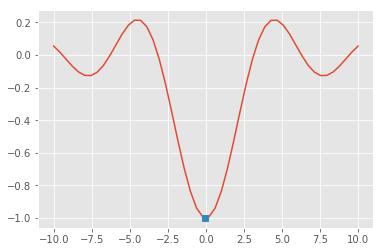

In [5]:
x = np.linspace(-10,10,50)
func = lambda x: -np.sin(x)/x
y = func(x)
plt.plot(x,y)

y_best = func(best['x'])
plt.plot(best['x'], y_best, marker='s')

Нашли)

Возвращаясь к нашим баранам, функция вданном случае будет возвращать метрику качества модели (пайплайна) на кроссвалидации. С помощью `hyperopt` мы будем искать минимум этой функции при заданных диаполознах значений гипер параметров.

Но самым важным плюсом, как по мне, является гибкость - в функцию, которую мы хотим минимизировать можно написать все что угодно. Например, сейчас я добавлю вариативность в пайплайне по типу шкалирования между - StandartScaler или RobustScaler.

In [24]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score

In [25]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

In [26]:
def run_trials_template(X, y, params, evals=100):

    def hyperopt_cv(X, y, params):
        
        X_ = X.copy()
        
        # Отделяем параметры лог регрессии в отдельный словарь
        lm_params = {}
        for k, v in params.items():
            if k.startswith('glob'):
                continue                
            elif k.startswith('lm'):
                lm_params[k.split('_', 1)[1]] = v
        
        # Задаем шкалирование
        if params['scaler_type'] == 'standart':
            scaler = StandardScaler(with_mean=params['scaler_centering'])
        else:
            assert params['scaler_type'] == 'robust'
            scaler = RobustScaler(with_centering=params['scaler_centering'])
        
        # Создаем лог рег с нужными параметрами
        clf = LogisticRegression(**lm_params)
        
        # Итоговый пайплайн
        model = Pipeline([
            ('scaler', scaler),
            ('clf', clf)
        ])

        # Схема кросс-валидации
        n_splits = 5
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, 
                             random_state=RND_SEED)
        scores = cross_val_score(model, X_, y,
                                 scoring='roc_auc', 
                                 cv=cv, 
                                 n_jobs=-1)

        # Возвращаем среднее значение метрики и отклонение (на всякий случай)
        return scores.mean(), scores.std()

    def f(params):
        acc, std = hyperopt_cv(X, y, params)
        return {'loss': -acc, 'qscore': -acc, 'qscore_std': std, 'status': STATUS_OK}

    trials = Trials()
    best = fmin(f, 
                params, 
                algo=tpe.suggest, 
                max_evals=evals, 
                trials=trials, 
                verbose=1)
    
    return trials

In [31]:
# Задаем пространство поиска
space4_lm = {
    'lm_penalty': hp.choice('penalty', ['l1', 'l2']),
    'lm_C': hp.loguniform('C', -5, 3),
    'lm_class_weight': hp.choice('class_weight', [None, 'balanced']),
    'lm_random_state': RND_SEED,
    'scaler_type': hp.choice('scaler_type', ['standart', 'robust']),
    'scaler_centering': hp.choice('scaler_centering', [False, True])
}

In [32]:
# Запускаем поиск
trials = run_trials_template(X, y, space4_lm, evals=40)

In [33]:
def trials_df(trials):
    '''
    Функция форматирует результаты hyperopt в dataframe
    '''
    tr_dict = []
    for t in trials:
        trial = dict()
        for k, v in t['misc']['vals'].items():
            trial[k] = v[0]

        trial['qscore'] = -t['result']['qscore']
        trial['qscore_std'] = -t['result']['qscore_std']
        tr_dict.append(trial)

    df_res = pd.DataFrame.from_dict(tr_dict)
    df_res = df_res.sort_values('qscore', ascending=False)
    
    return df_res

Достаем результаты.

Стоит оговорится, что в некоторых столбцах указаны не фактические значение гиперпараметров, а их позиция в соответствуюем поле в `space4_lm`

In [34]:
df_trials = trials_df(trials)

Здесь `qscore` - метрика качесва, а `scaler_type = 1` означает, что был выбран `scaler_type = robust`

## Ваш черед

### Новые признаки

Задание творческое - придумайте по новому признаку (группе признаков)
* На основе mcc (tr_type)
* На основе временного фактора
* На основе текстов из описания mcc

Реалиуйте их в функции, аналогичной `gen_features`.

In [ ]:
В качестве базовых признаков, до этого брали, 
количество (доля) транзакций по каждому mcc_code
количество (доля) транзакций в разные промежутки времени

теперь можно попробовать добавить tr_type
и потом еще день недели
и еще насколько часто пользуются карточкой, я взял средний срок сколько дней человек не пользовался картой(не изменило качетво модели)

In [15]:
def gen_features(df_gender, df_transactions):
# транзакции по tr_type    
    df_tr_type_counts = \
        df_transactions.pivot_table(index=['customer_id'], columns='tr_type', values='amount', 
                             aggfunc=np.size, fill_value=0)
    

    df_tr_type_counts = df_tr_type_counts.rename(lambda x: 'tr_type_{}_count'.format(x), axis=1)
# транзакции по mcc_code
    df_mcc_counts = \
        df_transactions.pivot_table(index=['customer_id'], columns='mcc_code', values='amount', 
                             aggfunc=np.size, fill_value=0)
    

    df_mcc_counts = df_mcc_counts.rename(lambda x: 'mcc_{}_count'.format(x), axis=1)
#     транзакции по промежутку времени (утро, день, вечер, ночь)
    df_hour_rations = \
        df_transactions.pivot_table(index=['customer_id'], columns='hour', values='amount', 
                             aggfunc=np.size, fill_value=0)
        
# добавим день недели
    df_weekday = \
        df_transactions.pivot_table(index=['customer_id'], columns='weekday', values='amount', 
                             aggfunc=np.size, fill_value=0)
    df_weekday = df_weekday.rename(lambda x: 'weekday_{}_count'.format(x), axis=1)
    
        

        # Сложная и нетривиальная конструкция
    total = df_hour_rations.sum(axis=1)
    df_hour_rations.loc[:, 'morning'] = (df_hour_rations.loc[:, '05':'11'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'day'] = (df_hour_rations.loc[:, '12':'17'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'evening'] = (df_hour_rations.loc[:, '18':'23'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'night'] = (df_hour_rations.loc[:, '00':'04'].sum(axis=1).T/total).T


    df_features=df_gender.join(df_tr_type_counts, on='customer_id', how='left')\
                         .join(df_hour_rations.loc[:, ['morning', 'day', 'evening', 'night']], on='customer_id', how='left')\
                         .join(df_mcc_counts, on='customer_id', how='left')\
                         .join(df_weekday, on='customer_id', how='left')\
                         .join(df_day['Pause'], on='customer_id', how='left')
                         
                         
        
    return df_features

In [16]:
df_features = df_gender.pipe(gen_features, df_transactions)

In [19]:
label = 'gender'
idx_features = df_features.columns != label

In [20]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

## Поиск гиперпараметров

Реализуйте функцию для hyperopt по перебору гипер параметров вашего пайплайна

На всякий случай почитайте еще про [`FeatureUnion`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html) и [пример](http://scikit-learn.org/stable/auto_examples/hetero_feature_union.html#sphx-glr-auto-examples-hetero-feature-union-py)

In [ ]:
# А это трансформер, который выбирает подможнество столбцов из матрицы X
# Который нужен для того, чтобы делать какие-то действия только для подмноества столбцов, а потом объединять результаты
# Через FeatureUnion

from sklearn.base import BaseEstimator, TransformerMixin

class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, col_idx):
        self.col_idx = col_idx
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[:, self.col_idx]

In [ ]:
Вот что получилось!!

In [35]:
df_trials.head()

,C,class_weight,penalty,qscore,qscore_std,scaler_centering,scaler_type
37,0.043604,0,0,0.840579,-0.003490,0,1
36,0.047072,0,0,0.840576,-0.003400,0,1
23,0.007066,0,1,0.839946,-0.002761,0,1
27,0.007150,0,1,0.839939,-0.002752,0,1
34,0.007230,0,1,0.839937,-0.002758,0,1
